In [1]:
# 1. Imports and Initial Setup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

# Display plots inline
%matplotlib inline

In [2]:
# 2. Load and Explore the Datasets
tiktok_profile_csv_path = './TikTok profiles dataset (Public web data).csv'
tiktok_profile_df = pd.read_csv(tiktok_profile_csv_path)

# Load the second dataset
tiktok_reviews_csv_path = './tiktok_app_reviews.csv'
tiktok_reviews_df = pd.read_csv(tiktok_reviews_csv_path).head(100000)

/tmp/ipykernel_22681/1662680436.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  tiktok_reviews_df = pd.read_csv(tiktok_reviews_csv_path).head(100000)


In [3]:
tiktok_profile_df.shape, tiktok_reviews_df.shape

((1000, 18), (100000, 5))

In [4]:
tiktok_profile_df.head()

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


In [5]:
tiktok_reviews_df.head()

,review_id,review_text,upvotes,app_version,posted_date
0,gp:AOqpTOGSsGv5rOA79ttW2LE0FeMYvkdUuXRMTfbyMk0...,It is an excellent solution to finding videos ...,402,21.2.5,2021-09-20 07:50:23
1,gp:AOqpTOEDQ9__FJihY_0V4iwqy4P2OK8tGVR1tFBixYb...,Great app works really well so many features s...,67,21.2.5,2021-09-19 23:10:47
2,gp:AOqpTOEGEfr8TL0iKTlpbTDeM8P7HywlMmP9CkHMoaT...,I down loaded app but didnt work . i love this...,24,21.2.5,2021-09-19 08:59:34
3,gp:AOqpTOGZBDl9dpghmb43Mx1tnlWCOjNXyuVn5Mxf49c...,IT A GREAT APP AND FUN TO USE! HOWEVER ARBITRA...,18,21.2.5,2021-09-19 16:34:43
4,gp:AOqpTOFioH3wud_JnC4aPCG4p7s5DEEN2yZAWNXdRJj...,Currently it's working good for me except a fe...,232,21.1.41,2021-09-14 06:35:02


In [6]:
# Display column names to look for common columns
tiktok_profile_df.columns

Index(['timestamp', 'account_id', 'nickname', 'biography',
       'awg_engagement_rate', 'comment_engagement_rate',
       'like_engagement_rate', 'bio_link', 'is_verified', 'followers',
       'following', 'likes', 'videos_count', 'create_time', 'id', 'top_videos',
       'url', 'profile_pic_url'],
      dtype='object')

In [7]:
tiktok_reviews_df.columns

Index(['review_id', 'review_text', 'upvotes', 'app_version', 'posted_date'], dtype='object')

In [8]:
tiktok_profile_df.isnull().sum()

timestamp                     0
account_id                    0
nickname                      0
biography                     3
awg_engagement_rate           0
comment_engagement_rate       0
like_engagement_rate          0
bio_link                    809
is_verified                   0
followers                     0
following                     0
likes                         0
videos_count                  0
create_time                1000
id                            0
top_videos                    0
url                           0
profile_pic_url               0
dtype: int64

In [9]:
tiktok_profile_df.describe()

,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,followers,following,likes,videos_count,create_time,id
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,0.0,1.000000e+03
mean,0.562932,0.026569,0.536364,1.130869e+05,1136.810000,3.371786e+06,271.942000,NaN,6.261038e+18
std,3.222055,0.140016,3.159788,6.698270e+05,2072.258891,3.128021e+07,464.261197,NaN,1.870752e+18
min,0.000091,0.000000,0.000000,1.000000e+00,0.000000,3.000000e+00,1.000000,NaN,1.610000e+05
25%,0.012528,0.000252,0.011791,6.712500e+02,75.750000,1.930000e+03,18.000000,NaN,6.656165e+18
50%,0.053558,0.001203,0.049653,5.241000e+03,295.000000,3.895000e+04,88.000000,NaN,6.804025e+18
75%,0.202409,0.006157,0.189987,3.160000e+04,1065.750000,4.986000e+05,318.000000,NaN,6.936877e+18
max,63.375000,2.000000,63.000000,1.450000e+07,10000.000000,8.635000e+08,5394.000000,NaN,7.253326e+18


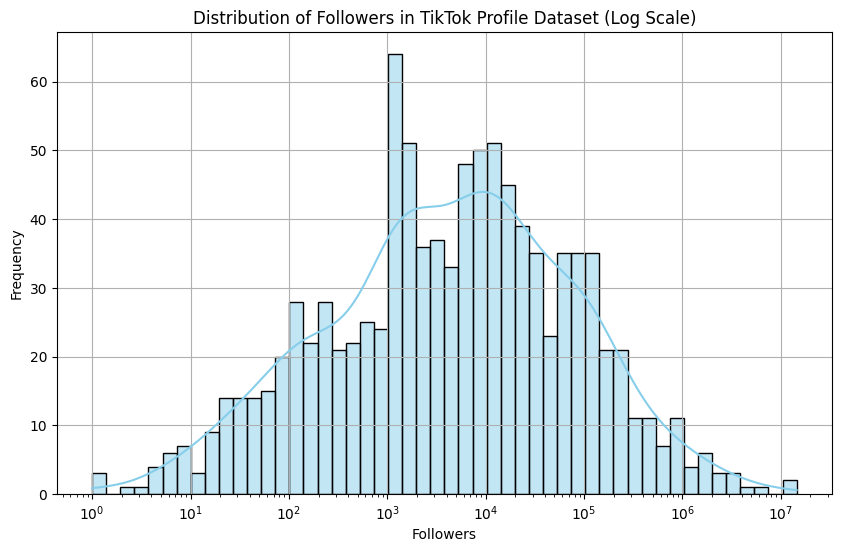

In [10]:
# Distribution of followers (Log scale)
plt.figure(figsize=(10, 6))
sns.histplot(tiktok_profile_df['followers'], bins=50, color='skyblue', kde=True, log_scale=True)
plt.title('Distribution of Followers in TikTok Profile Dataset (Log Scale)')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

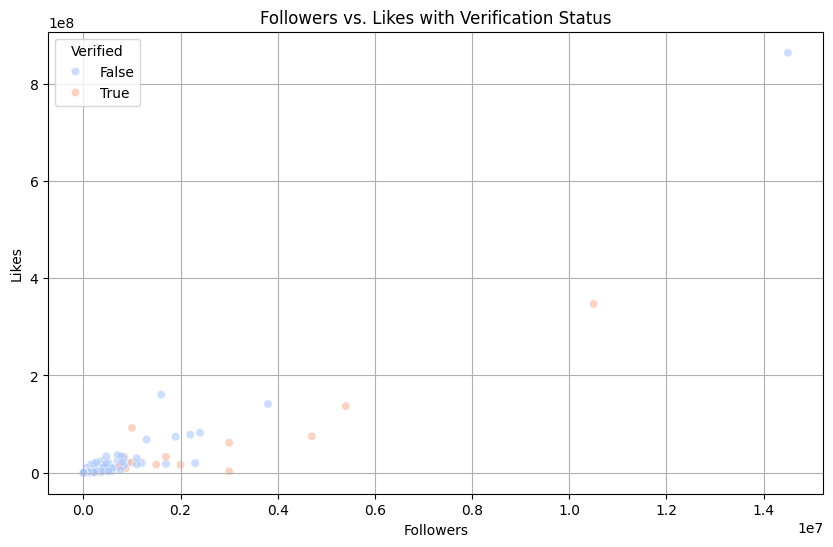

In [11]:
# Scatter plot of followers vs. likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tiktok_profile_df, x='followers', y='likes', hue='is_verified', palette='coolwarm', alpha=0.6)
plt.title('Followers vs. Likes with Verification Status')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.legend(title='Verified')
plt.grid(True)
plt.show()

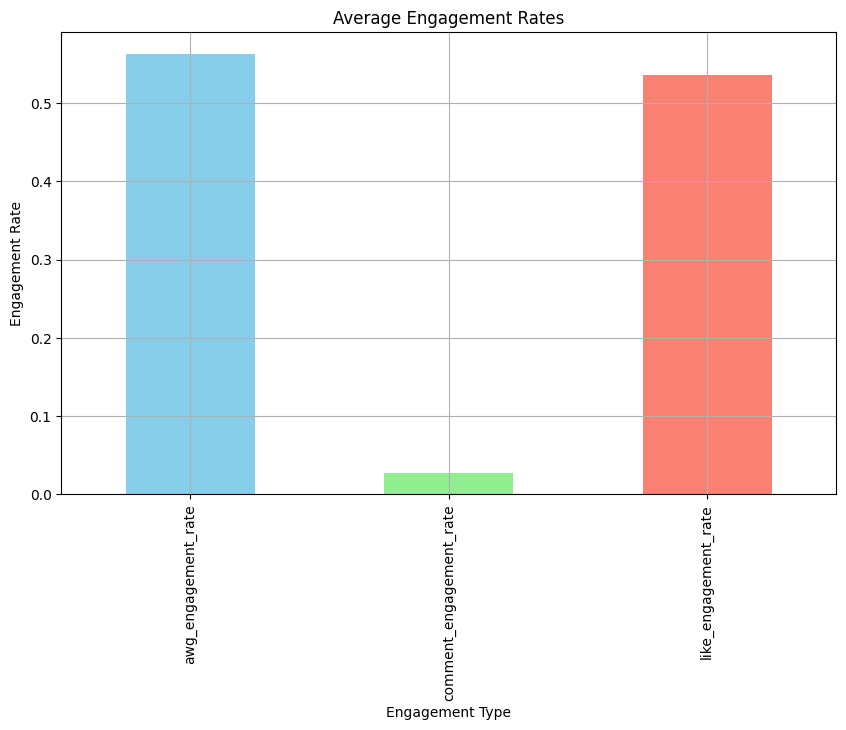

In [12]:
# Average engagement rates
engagement_rates = tiktok_profile_df[['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate']].mean()
plt.figure(figsize=(10, 6))
engagement_rates.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Engagement Rates')
plt.ylabel('Engagement Rate')
plt.xlabel('Engagement Type')
plt.grid(True)
plt.show()

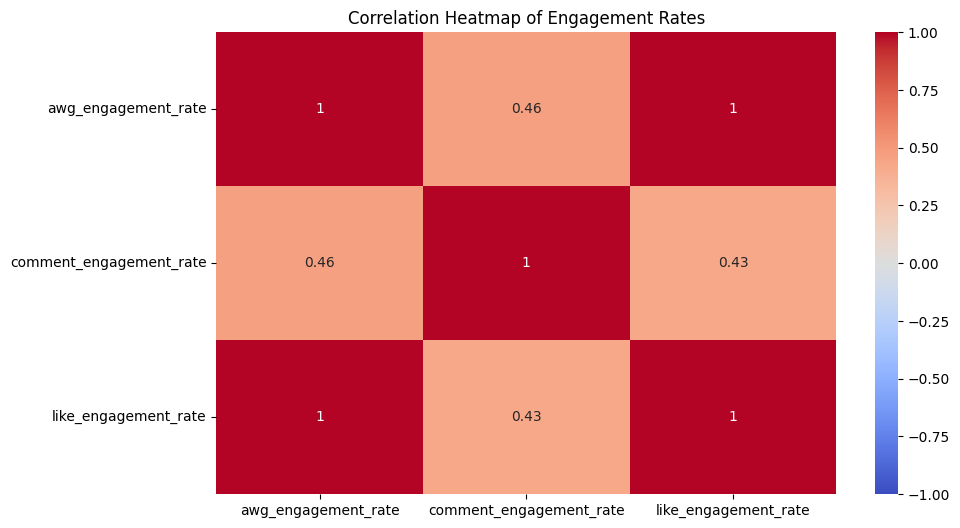

In [13]:
# Correlation heatmap of engagement rates
plt.figure(figsize=(10, 6))
sns.heatmap(tiktok_profile_df[['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Engagement Rates')
plt.show()

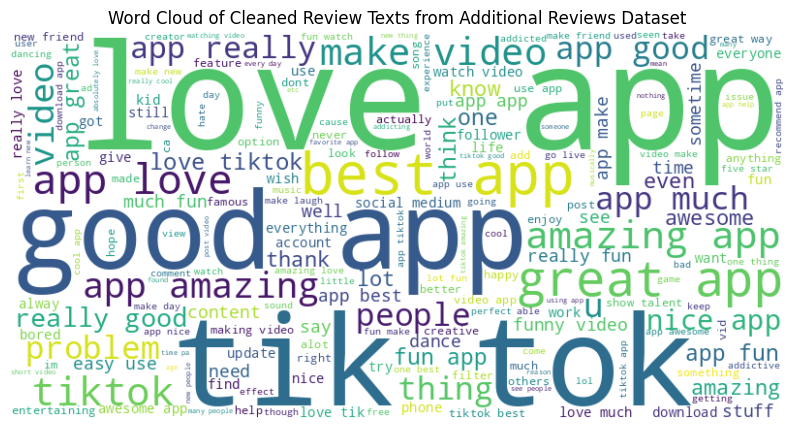

In [14]:
# Convert non-string values to strings and handle missing values
tiktok_reviews_df['review_text'] = tiktok_reviews_df['review_text'].astype(str).fillna('')

# Function for text preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
tiktok_reviews_df['cleaned_review_text'] = tiktok_reviews_df['review_text'].apply(preprocess_text)

# Generate word cloud
cleaned_reviews_text = ' '.join(tiktok_reviews_df['cleaned_review_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Review Texts from Additional Reviews Dataset')
plt.show()

In [15]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(tiktok_reviews_df['review_text'])
y = tiktok_reviews_df['upvotes']

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 35352.87231789756
R^2 Score: 0.00621540277696353


In [19]:
# For tiktok_profile_df
if 'review_text' in tiktok_profile_df.columns and 'upvotes' in tiktok_profile_df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
    plt.xlabel('Actual Upvotes')
    plt.ylabel('Predicted Upvotes')
    plt.title('Actual vs Predicted Upvotes for TikTok Profiles Dataset')
    plt.grid(True)
    plt.show()

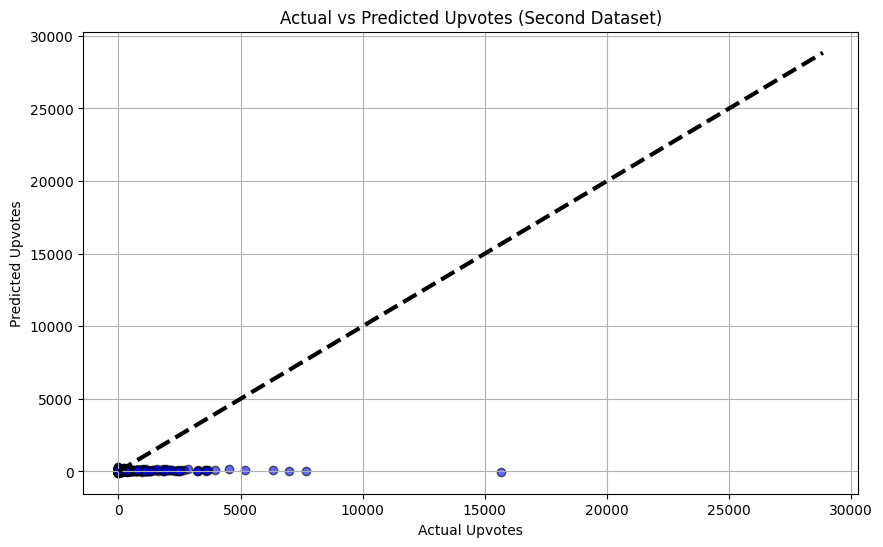

In [20]:
# 6. Summarize the Model Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual Upvotes')
plt.ylabel('Predicted Upvotes')
plt.title('Actual vs Predicted Upvotes (Second Dataset)')
plt.grid(True)
plt.show()

       Feature  Coefficient  Absolute Coefficient
286  favorites   447.150057            447.150057
884      touch   366.821923            366.821923
173     couple   258.336661            258.336661
65     anyways   237.717193            237.717193
734      seems   217.271394            217.271394
675     public   214.642462            214.642462
406    however   213.176495            213.176495
305      fixed   193.952997            193.952997
457     killer   192.146209            192.146209
810    suggest   189.261815            189.261815
73        aren   178.417124            178.417124
597      often   172.332758            172.332758
32      advice   165.584114            165.584114
64      anyway   151.683932            151.683932
952      weeks   150.648365            150.648365
735       seen   145.518862            145.518862
29        adds   145.298796            145.298796
661   possible   142.878826            142.878826
100    besides   141.765116            141.765116


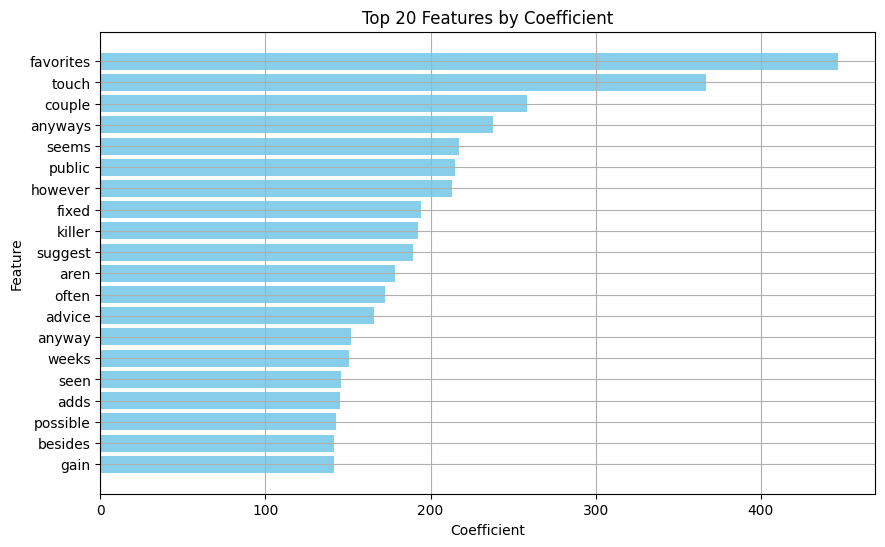

In [21]:
# 7. Feature Importance
# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_

# Create a DataFrame for the feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute value of coefficients
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top 20 features
print(feature_importance_df.head(20))

# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Coefficient'].head(20), color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [22]:
# 7. Save Results
tiktok_profile_df.describe().to_csv('./tiktok_profile_summary.csv')
print('TikTok profile dataset summary saved to tiktok_profile_summary.csv')

TikTok profile dataset summary saved to tiktok_profile_summary.csv


In [23]:
wordcloud.to_file('./additional_reviews_wordcloud.png')
print('Word cloud saved to additional_reviews_wordcloud.png')

Word cloud saved to additional_reviews_wordcloud.png
